<a href="https://colab.research.google.com/github/AMMLRepos/predict-mental-burnout-of-employeesu/blob/main/Analyzing_and_predicting_employee_burnout_during_pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview 
COVID 19 pandemic has bought never though and un-imagined situation for whole world. While it has impacted all sectors of work and life, IT sector employees or white-collar employees are the one who are least impacted with the expected outcomes. Instead, many articles and comments on LinkedIn suggested that WFH has resulted in increased productivity for an organization. Many complained about burn-out and mental stress blaming WFH for leaving no boundries in their personal and job life. 
We will analyze the openely available [data from Kaggle](https://www.kaggle.com/blurredmachine/are-your-employees-burning-out)

#Expected outcome 
- Analyze the available data to answer stats from the data 
- Develop a model to predict if an employee is burn-out or not 

#What data do we have ?
- **Employee ID**: The unique ID allocated for each employee (example: fffe390032003000)
- **Date of Joining**: The date-time when the employee has joined the organization (example: 2008-12-30)
- **Gender**: The gender of the employee (Male/Female)
- **Company Type**: The type of company where the employee is working (Service/Product)
- **WFH Setup Available**: Is the work from home facility available for the employee (Yes/No)
- **Designation**: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.
- **Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours.In the range of [1.0, 10.0] (higher means more resource)
- **Mental Fatigue Score**: The level of fatigue mentally the employee is facing.In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
- **Burn Rate**: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

#Major steps 
- Setup development environment - Google Colab, Python libraries 
- Download data using [opendatasets library](https://github.com/JovianML/opendatasets) developed by [Jovian](https://jovian.ai)
- Perform visualizations on the training data and get some stats displayed
- Build a model and predict 

#Step 1 - Install libraries needed for development environment setup and import them

In [40]:
!pip install opendatasets pandas numpy matplotlib seaborn sklearn --quiet

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_theme(style = "darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<Figure size 576x432 with 0 Axes>

#Step 2 - Download data from Kaggle

In [42]:
import opendatasets as od
import os

dataset_url = "https://www.kaggle.com/blurredmachine/are-your-employees-burning-out"
od.download(dataset_url)

data_dir = os.listdir()[1]
file_list = os.listdir("./are-your-employees-burning-out")
print(file_list)

Skipping, found downloaded files in "./are-your-employees-burning-out" (use force=True to force download)
['test.csv', 'train.csv', 'sample_submission.csv']


#Step 3 - Load train.csv into pandas

In [43]:
file_path = "./are-your-employees-burning-out/" + "train.csv"
raw_employee_df = pd.read_csv(file_path)
print(raw_employee_df)

                    Employee ID Date of Joining  Gender Company Type WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  Burn Rate
0      fffe32003000360033003200      2008-09-30  Female      Service                  No          2.0                  3.0                   3.8       0.16
1          fffe3700360033003500      2008-11-30    Male      Service                 Yes          1.0                  2.0                   5.0       0.36
2      fffe31003300320037003900      2008-03-10  Female      Product                 Yes          2.0                  NaN                   5.8       0.49
3      fffe32003400380032003900      2008-11-03    Male      Service                 Yes          1.0                  1.0                   2.6       0.20
4      fffe31003900340031003600      2008-07-24  Female      Service                  No          3.0                  7.0                   6.9       0.52
...                         ...             ...     ...         

Based on the above output, we can see that we have many categorical features like gender, WFH setup availability, date of joining, company type, etc. Also, we have employee Id which is nothing but a unique identified of an employee and will not have any impact on our analysis of model development. We can get rid of that column and then analyze the data available

Remove "Employee ID" column from the dataframe

In [44]:
raw_employee_df = raw_employee_df.drop("Employee ID", axis = 1)
print(raw_employee_df)

      Date of Joining  Gender Company Type WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  Burn Rate
0          2008-09-30  Female      Service                  No          2.0                  3.0                   3.8       0.16
1          2008-11-30    Male      Service                 Yes          1.0                  2.0                   5.0       0.36
2          2008-03-10  Female      Product                 Yes          2.0                  NaN                   5.8       0.49
3          2008-11-03    Male      Service                 Yes          1.0                  1.0                   2.6       0.20
4          2008-07-24  Female      Service                  No          3.0                  7.0                   6.9       0.52
...               ...     ...          ...                 ...          ...                  ...                   ...        ...
22745      2008-12-30  Female      Service                  No          1.0               

#Step 4 - Get basic stats on the data we have

In [45]:
raw_employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


As shown in the output, we can see we have -
- 22750 records in the dataset 
- There are missing values for Resource allocation, mental fatigue score and burn rate 
- Type of data is object(string) and float 
- Burn rate is the target label and is to be predicted

In [46]:
raw_employee_df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


Based on the output shown above, we have following inferences -
- More that 75% of our records have designation of 3 (5 being highest)
- More than 75% of our records have resource allocation value of 6 (10 being highest)
- Same with Mental Fatigure score 

While all features will have an impact on the burn out rate, there will be critical features like Mental Fatigue score, resource allocation, gender which might impact the burn out rate. 

Let us try to visualize a few relations

#Step 5 - Visualization of data

## Count plots 
Let us plot a count plot to understand the number of records or samples we have for each column of interest



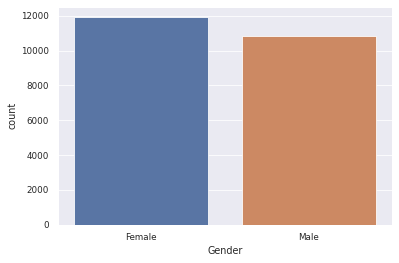

In [47]:
sns.countplot(x = "Gender", data = raw_employee_df);

Let us plot countplot for other categorical columns, i.e., Company Type, WFH Setup Available

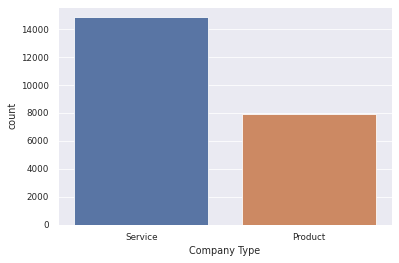

In [48]:
sns.countplot(x = "Company Type", data = raw_employee_df);

We can see that almost double the employees work in a service based company. This could really impact our analysis

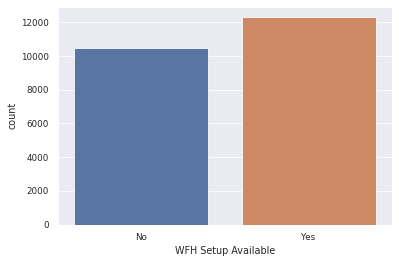

In [49]:
sns.countplot(x = "WFH Setup Available", data = raw_employee_df);

Work from home setup is available for almost 12 K employee in our records 

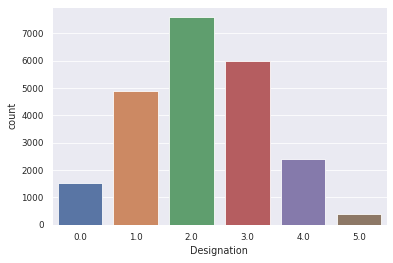

In [50]:
sns.countplot(x = "Designation", data = raw_employee_df);

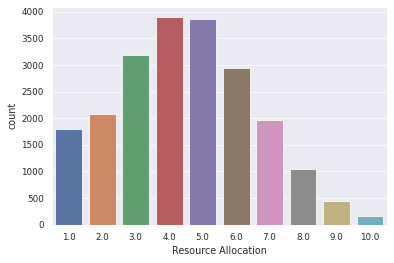

In [51]:
sns.countplot(x = "Resource Allocation", data = raw_employee_df);

## Relational plots
Relational plots will help us understand how two features are impacting each other 

In [52]:
print(raw_employee_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB
None


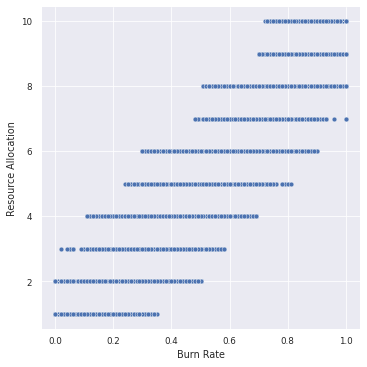

In [53]:
sns.relplot(x = "Burn Rate", y = "Resource Allocation", data = raw_employee_df) ;

See the graph above, we can see that burn out rate is much more (greater than 0.6) where number of resources allocated is more than 8. With this we infer -

**Number of resources allocated to an employee impacts the burn our. If employee is allocated with more resources, his/her burn out rate will be much more compared to others**

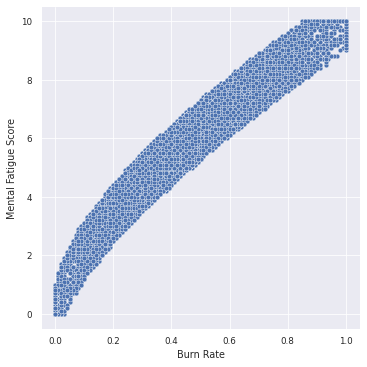

In [54]:
sns.relplot(x = "Burn Rate", y = "Mental Fatigue Score", data = raw_employee_df) ;

The above relation graph clearly shows that Mental Fatigue score is a major feature impacting the burn out. We infer - 

**Burn rate increases with Mental Fatigue score.They are too inter-related** 

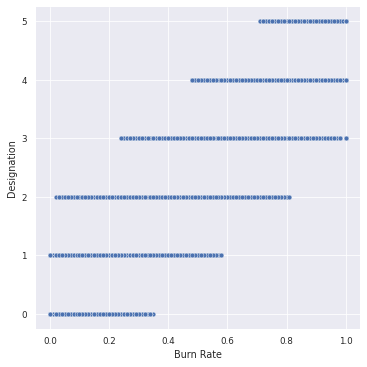

In [55]:
sns.relplot(x = "Burn Rate", y = "Designation", data = raw_employee_df) ;

Designation does not really seem to have a major impact in the burn-outs 

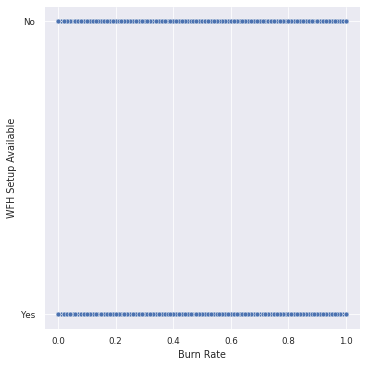

In [56]:
sns.relplot(x = "Burn Rate", y = "WFH Setup Available", data = raw_employee_df) ;

This feature does not seem to impact the burn-out in any sense 

## Correlation matrix 
Let us get the correlation matrix to identify which features are impacting each other. Correlation matrix only works on numerical data and hence will rule out all categorical columns. 

We can get the correlation with categorical columns later by some encoding techniques 

In [57]:
raw_employee_df.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878459,0.690983,0.737556
Resource Allocation,0.878459,1.000000,0.799662,0.856278
Mental Fatigue Score,0.690983,0.799662,1.000000,0.944546
Burn Rate,0.737556,0.856278,0.944546,1.000000


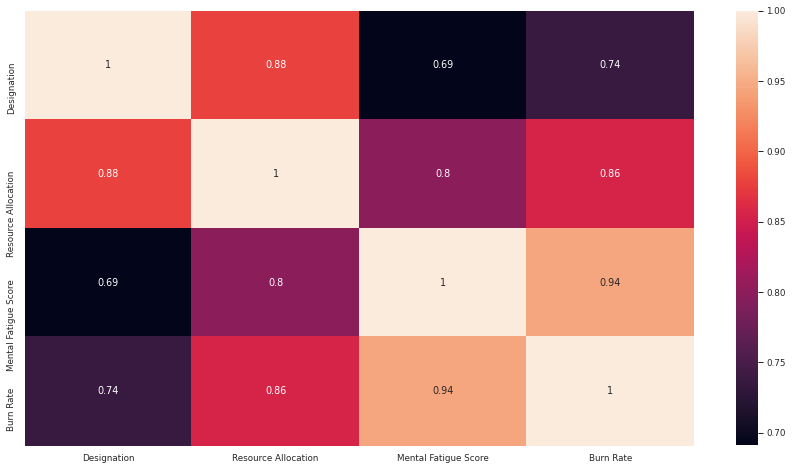

In [58]:
plt.figure(figsize = (15,8))
sns.heatmap(raw_employee_df.corr(), annot=True);

We can clearly see that Mental Fatigue score and burn rate are directly impacting each other. There are some other good correlations between Resource allocation, burn rate, designation and resource allocation, etc. 

#Step 6 - Answer statistical questions below from the data 

|Questions|
|--|
|How many employees are extreamly burned out (having burn rate greater than 7.0?|
|How many males and females are extreamly burned out (having burn rate greater than 7.0)?|
|Get the count of employee burn out in product and service based companies (having burn rate greater than 7.0?)|
|Are product based company employees more burned out ?|
|Who is more burned out - Junior(1), intermediate(2,3) or seniors(4,5) ?| 



Let us try to get these stats

## How many employees are burned out in the following categories ?
- Extreamly burned out = Burn Rate >= 0.7
- Moderately burned out = Burn Rate between 0.5 and 0.7 
- Slightly burned out = Burn Rate less than 0.5
- Not burned out = Burn Rate = 0.0

In [59]:
#How many employees are extreamly burned out (having burn rate greater than 0.7 ?
extream_burn_rate_df = raw_employee_df[raw_employee_df["Burn Rate"] >= 0.7]
extreamly_burned_out_count = extream_burn_rate_df["Burn Rate"].count()
print("Number of employees who are extreamly burned out =", extreamly_burned_out_count)

percent = extreamly_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Extreamly burned out = " , percent * 100, " %")

Number of employees who are extreamly burned out = 2403
Percentage of exmployees who fall under Extreamly burned out =  10.562637362637362  %


In [60]:
#How many employees are moderately burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
moderate_burn_rate_df = raw_employee_df[(raw_employee_df["Burn Rate"] >= 0.5) & (raw_employee_df["Burn Rate"] < 0.7)]
moderately_burned_out_count = moderate_burn_rate_df["Burn Rate"].count()
print("Number of employees who are moderately burned out =", moderately_burned_out_count)

percent = moderately_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Moderately burned out = " , percent * 100, " %")

Number of employees who are moderately burned out = 6625
Percentage of exmployees who fall under Moderately burned out =  29.120879120879124  %


In [61]:
#How many employees are moderately burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
slightly_burn_rate_df = raw_employee_df[(raw_employee_df["Burn Rate"] > 0.0) & (raw_employee_df["Burn Rate"] < 0.5)]
slightly_burned_out_count = slightly_burn_rate_df["Burn Rate"].count()
print("Number of employees who are slightly burned out =", slightly_burned_out_count)

percent = slightly_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Slightly burned out = " , percent * 100, " %")

Number of employees who are slightly burned out = 12326
Percentage of exmployees who fall under Slightly burned out =  54.18021978021979  %


In [62]:
#How many employees are not burned out at all ?
no_burn_rate_df = raw_employee_df[raw_employee_df["Burn Rate"] == 0]
no_burned_out_count = no_burn_rate_df["Burn Rate"].count()
print("Number of employees who are not burned out =", no_burned_out_count)

percent = no_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under No burned out = " , percent * 100, " %")

Number of employees who are not burned out = 272
Percentage of exmployees who fall under No burned out =  1.1956043956043956  %


## Gender wise count of burned out in the following categories ?
- Extreamly burned out = Burn Rate >= 0.7
- Moderately burned out = Burn Rate between 0.5 and 0.7 
- Slightly burned out = Burn Rate less than 0.5
- Not burned out = Burn Rate = 0.0

Let us add a new column "Burnout Category" with following conditions - 
- Extreme Burn out when Burn Rate > 0.7
- Moderate Burn out when Burn Rate >= 0.5 and burn Rate < 0.7
- Slight Burn out when Burn Rate < 0.5

In [63]:
raw_employee_df['Burnout Category'] = np.where(
    raw_employee_df['Burn Rate'] > 0.7, "Extreme", #Else below
    np.where((raw_employee_df["Burn Rate"] >= 0.5) & (raw_employee_df["Burn Rate"] < 0.7), "Moderate", #else below
    np.where(raw_employee_df['Burn Rate'] < 0.5, "Slight", "No Burnout"  )))

In [64]:
males_count_extreme = raw_employee_df[(raw_employee_df['Burnout Category'] == "Extreme") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()
males_count_moderate = raw_employee_df[(raw_employee_df['Burnout Category'] == "Moderate") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()
males_count_slight = raw_employee_df[(raw_employee_df['Burnout Category'] == "Slight") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()

print("Number of males with Extreme Burnout = ", males_count_extreme)
print("Number of males with Moderate Burnout = ", males_count_moderate)
print("Number of males with Slight Burnout = ", males_count_slight)

Number of males with Extreme Burnout =  1300
Number of males with Moderate Burnout =  3865
Number of males with Slight Burnout =  4992


In [65]:
females_count_extreme = raw_employee_df[(raw_employee_df['Burnout Category'] == "Extreme") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()
females_count_moderate = raw_employee_df[(raw_employee_df['Burnout Category'] == "Moderate") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()
females_count_slight = raw_employee_df[(raw_employee_df['Burnout Category'] == "Slight") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()

print("Number of females with Extreme Burnout = ", females_count_extreme)
print("Number of females with Moderate Burnout = ", females_count_moderate)
print("Number of females with Slight Burnout = ", females_count_slight)

Number of females with Extreme Burnout =  898
Number of females with Moderate Burnout =  2760
Number of females with Slight Burnout =  7606


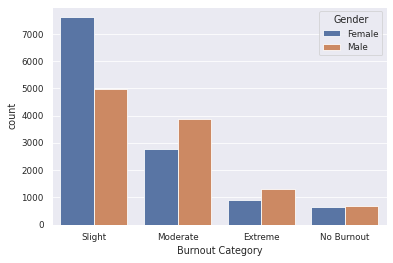

In [66]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Gender");

The above graph indicates the following - 
- Male count is more in Moderate and Extreme burnout and hence we can say that WFH impacted Males more than Females in terms of burn out. This conclusion even makes sense as we have more number of females records compared to male records


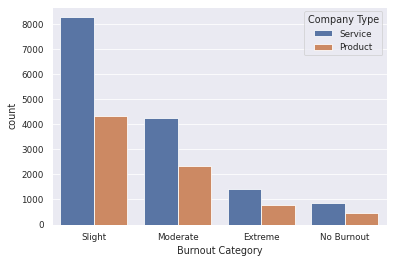

In [67]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Company Type");

The above count from the graph clearly indicates that employees working in Service based companies are more burned-out

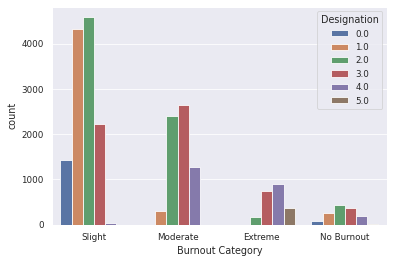

In [68]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Designation");

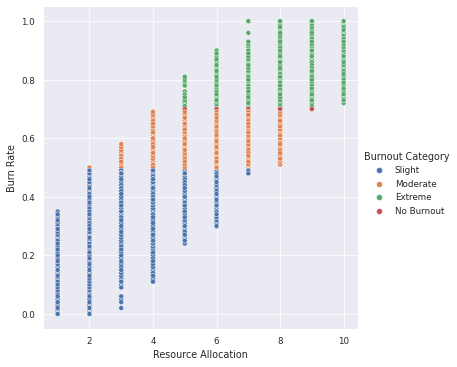

In [72]:
sns.relplot(x = "Resource Allocation", y = "Burn Rate", data = raw_employee_df, hue = "Burnout Category");

#Conclusions 
Here is the list of few conclusions made based on the data -

- 10 % of total employees are extreamly burned out 
- 29 % of total employees are moderately burned out
- 54 % of total employees are slightly burned out 
- Only 1 % of total employees are not burned out
- 59 % of males and 41 % percent of females are extreamly burned out which concludes that males are more burned out compared to females 
- Overall, Males are more burned out compared to females as majority of females are slightly burnedout while majority of males are moderately and extremely burnedout
- Employees working in a Service based company are more Burned-out compared to an employee working in a Product based company
